In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

eventB_pulse10 has the veddyvisc that used in order to calculate the boundary velocity input for eventB_pulse10_bdy.

In [12]:
gridW = xr.open_dataset('../../../results_mackenzie/idealized/upwelling_events/eventB_pulse10_bdy/GYRE_1h_20170101_20170120_grid_W.nc')
vE = gridW['veddyvisc'][:,:,:,:]
depthw = gridW['depthw'][:]
x = gridW['x']

     zdf_init: vertical physics
     ~~~~~~~~
        Namelist namzdf : set vertical mixing mixing parameters
        vertical eddy viscosity             rn_avm0   =   1.200000000000000E-004
        
        
Until now, I have been using the values for **veddyvisc** from the the "-2" y index (**indN**), which is the row just behind the northern boundary. This is because here I find values for **veddyvisc** similar to that specified in the namelist with parameter **rn_avm0**. Using **indN** = -1, which is the boundary, gives me **veddyvisc**=0.

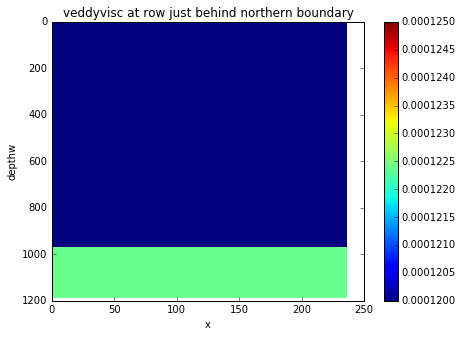

In [18]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
p = ax.pcolor(x, depthw, vE[0, :, -2, :], vmin=0.00012, vmax=0.000125)
fig.colorbar(p)
ax.invert_yaxis()
ax.set_ylabel('depthw')
ax.set_xlabel('x')
ax.set_title('veddyvisc at row just behind northern boundary')

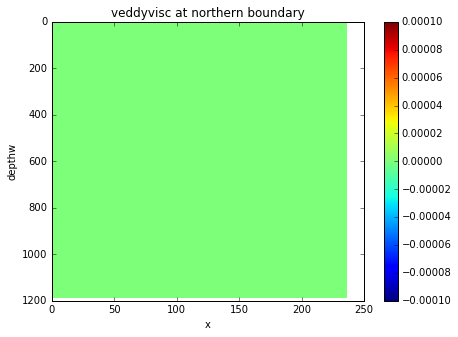

In [14]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
p = ax.pcolor(x, depthw, vE[0, :, -1, :], vmin=0.0001, vmax=-0.0001)
fig.colorbar(p)
ax.invert_yaxis()
ax.set_ylabel('depthw')
ax.set_xlabel('x')
ax.set_title('veddyvisc at northern boundary')

Here, I check if **veddyvisc** changes with time. It does if **indN** = -2 but not if **indN** = -1. 

In [15]:
diff_vE_in_time = np.diff(vE[:, :, -2, :], axis=0)
diff_vE_in_time.shape, diff_vE_in_time.min(), diff_vE_in_time.max()

((479, 20, 237), -2.3908796720206738e-08, 3.1293893698602915e-08)

In [17]:
diff_vE_in_time = np.diff(vE[:, :, -1, :], axis=0)
diff_vE_in_time.shape, diff_vE_in_time.min(), diff_vE_in_time.max(), np.unique(vE[:, :, -1, :])

((479, 20, 237), 0.0, 0.0, array([ 0.]))

In ekman_velocities_boundary.ipynb, I use **veddyvisc** to calculate the ekman layer thickness used for the ekman velocities. However, the **veddyvisc** I use changes in time, which I wouldn't have unless I run the simulation and get grid_W. But, this variation is never bigger than 3e-08 so, is it worth worrying about?

**Temporary solution** (June 21): Make an array with [time, depth, y, x] shape filled with the value for **rn_avm0**. But, if I were to have runs for the same resolution in x/y and depth levels, then I would use the **veddyvisc** values.

In [23]:
rn_avm0 = 1.2e-4
vE = np.ones([480, 20, 177, 237]) * rn_avm0